 # Project Title

## SyriaTel Customer Churn Prediction

----
# Problem Statement

SyriaTel, a telecom provider, is facing customer churn—when users discontinue service. Retaining customers is more cost-effective than acquiring new ones. Therefore, being able to predict churn in advance enables proactive strategies to retain at-risk customers.

---
# Objective

To develop a machine learning classifier that accurately identifies customers who are at risk of leaving SyriaTel, enabling the business to take targeted retention actions.

---
# Business Value

If churn can be predicted with reasonable accuracy, SyriaTel can:

* Target at-risk customers with promotions or incentives

* Optimize resource allocation to customer service teams

* Improve customer satisfaction and loyalty

# Data Understanding

1.Loading Data

In [3]:
# Run this without any modifications
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import warnings
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
# Load the dataset
df=pd.read_csv('churn.csv')
# preview the data
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# shape of the data
print("Shape of the dataset:", df.shape)

Shape of the dataset: (3333, 21)


In [6]:
# statistical summary of the data
print("Statistical summary of the dataset:\n", df.describe())

Statistical summary of the dataset:
        account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
st

In [7]:
# General information about the data
print("Data types and non-null counts:\n", df.info())       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
# Check missing
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist

# Categorical columns   
categorical_cols = df.select_dtypes(include=['object']).columns.tolist

# check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Check missing
df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape of the dataset:", df.shape)



Missing values in each column:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64
Number of duplicate rows: 0


#  A : Exploratory Data Analysis  (EDA)

Step 1: Churn Distribution:
 Check Churn Class Balance

Churn Value Counts:
churn
False    2850
True      483
Name: count, dtype: int64

Churn Percentage:
churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_17216\922697261.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='Set2')


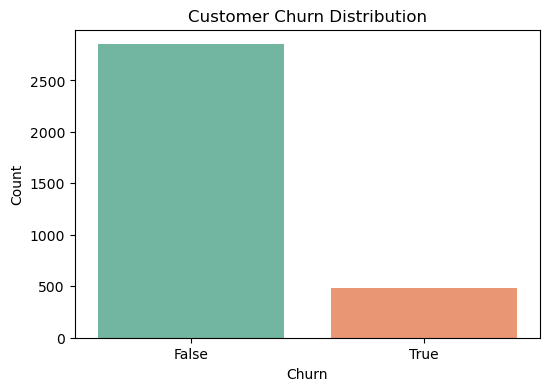

In [10]:
# Count churn values
churn_counts = df['churn'].value_counts()
churn_percentage = df['churn'].value_counts(normalize=True) * 100

print("Churn Value Counts:")
print(churn_counts)

print("\nChurn Percentage:")
print(churn_percentage)

# Bar plot
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df, palette='Set2')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()



* Choosing 3 or 4 clusters would likely give you the best balance between model simplicity and accuracy.

Step 2: Numerical Feature Distributions by Churn

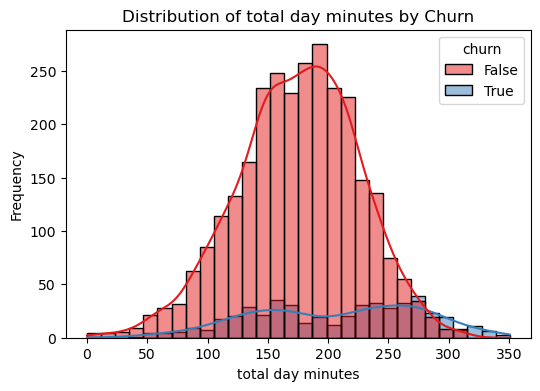

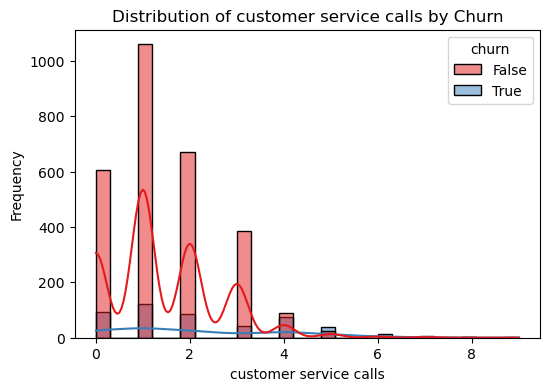

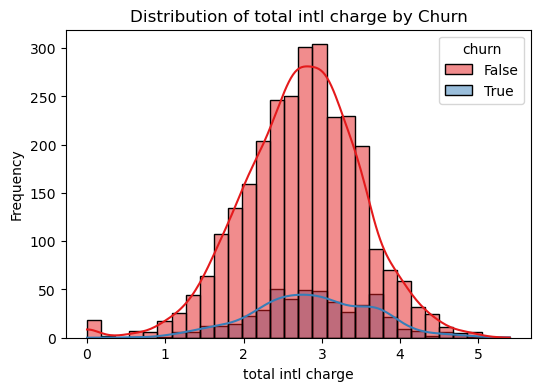

C:\Users\PC\AppData\Local\Temp\ipykernel_17216\3724322193.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_state.index, y=churn_by_state.values, palette='coolwarm')


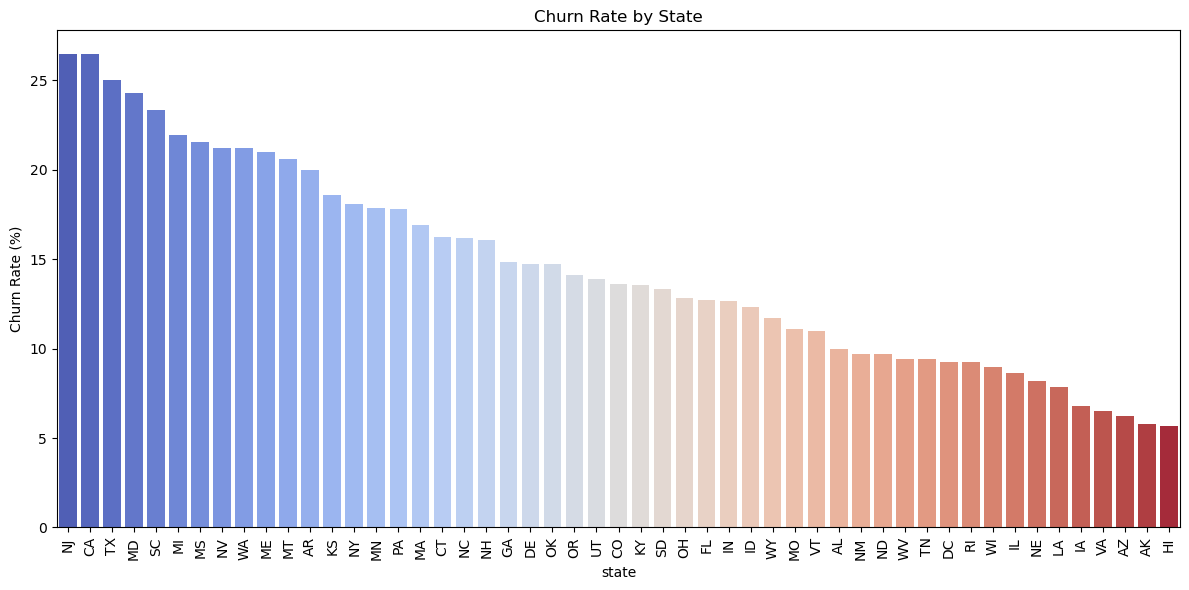

In [11]:
# Plotting distribution of selected features
features = ['total day minutes', 'customer service calls', 'total intl charge']

for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='churn', kde=True, bins=30, palette='Set1')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Calculate churn rate by state
churn_by_state = df.groupby('state')['churn'].mean().sort_values(ascending=False) * 100

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_by_state.index, y=churn_by_state.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by State')
plt.tight_layout()
plt.show()


* Higher usage leads to higher churn: Customers with more day-time minutes and higher international charges are more likely to churn.

* Customer dissatisfaction is a key factor: Those who made more customer service calls show a clear trend toward churn.

* These patterns suggest that high-usage customers and those needing frequent support should be prioritized for retention efforts.

* The model performs well overall, especially at identifying non-churners. However, recall for churners is lower, meaning it misses some customers who are likely to churn — potential area to improve.

 Step 3: Correlation Heatmap

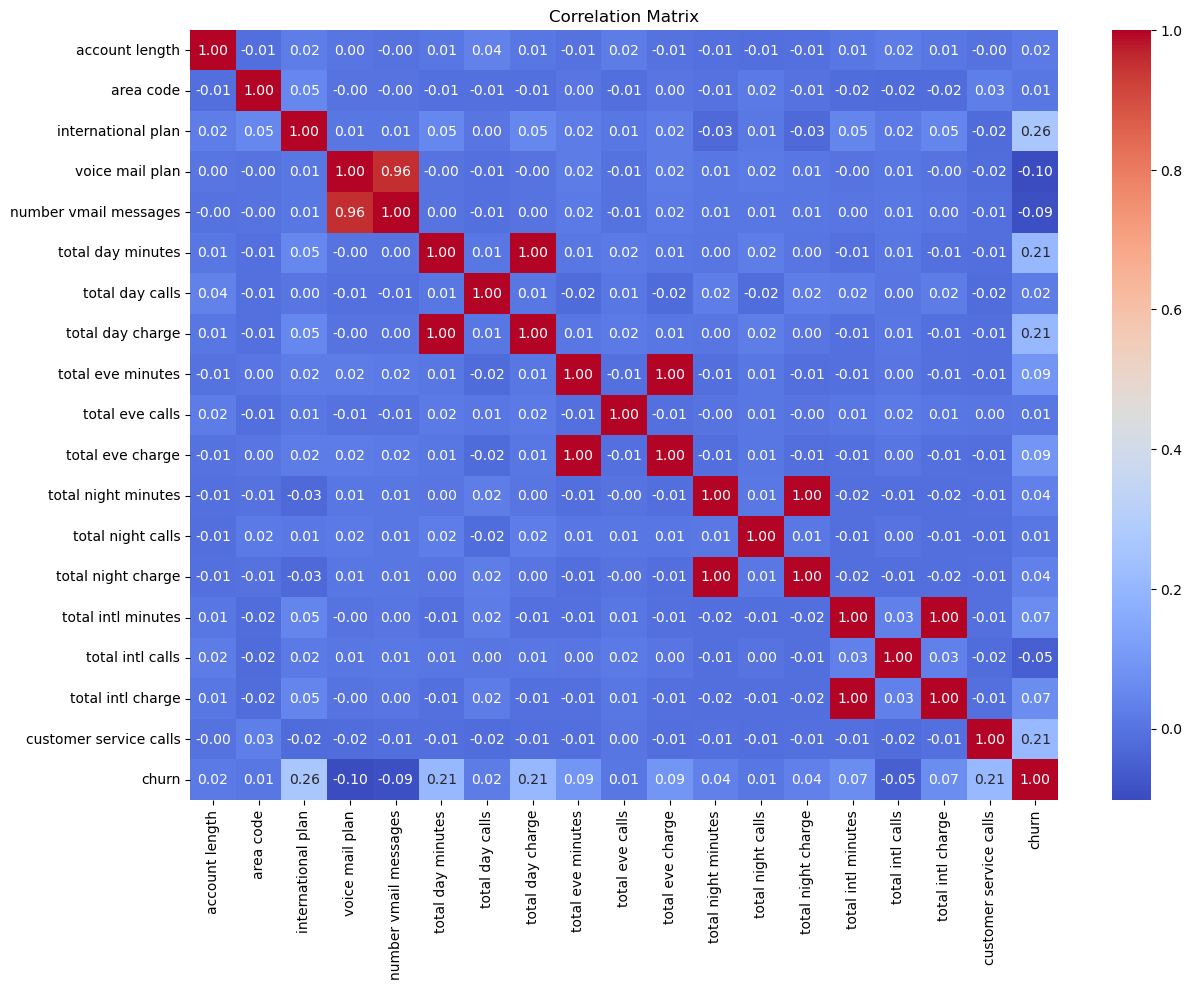

In [12]:
# Convert binary categorical columns to numeric
df_corr = df.copy()
df_corr['international plan'] = df_corr['international plan'].map({'yes': 1, 'no': 0})
df_corr['voice mail plan'] = df_corr['voice mail plan'].map({'yes': 1, 'no': 0})
df_corr['churn'] = df_corr['churn'].astype(int)

# Select only numeric columns
numeric_df = df_corr.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Churn is most positively correlated with:

* Customer service calls -Frequent calls indicate dissatisfaction.

* Total day minutes/charges - High usage may lead to churn, possibly from high costs.

Churn is weakly negatively correlated with:

* Voice mail plan - Customers with this plan churn slightly less.

Strong internal correlations exist between:

* Minutes and charges across all time periods (e.g., day, evening, night, intl).

Step 4: Churn Rate by Plan Type

C:\Users\PC\AppData\Local\Temp\ipykernel_17216\976642485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='international plan', y='churn', data=df, estimator=lambda x: sum(x)/len(x), palette='pastel')


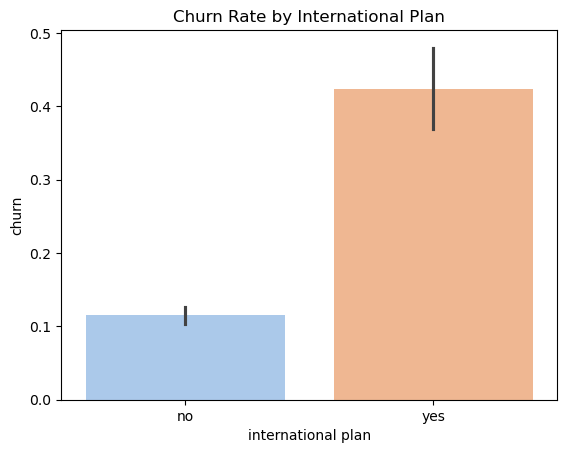

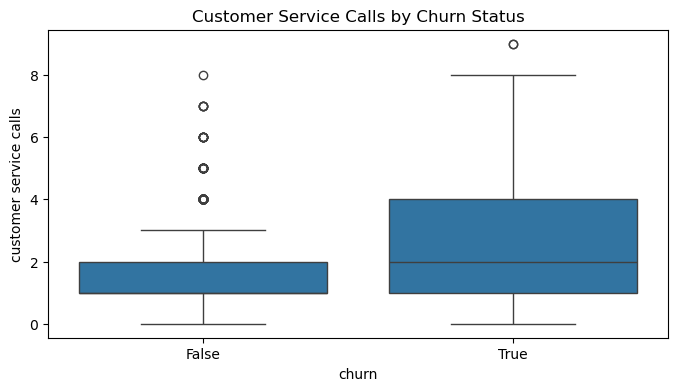

In [13]:
# Churn rate vs International Plan
sns.barplot(x='international plan', y='churn', data=df, estimator=lambda x: sum(x)/len(x), palette='pastel')
plt.title('Churn Rate by International Plan')
plt.show()

# Churn rate vs Customer Service Calls
plt.figure(figsize=(8,4))
sns.boxplot(x='churn', y='customer service calls', data=df)
plt.title('Customer Service Calls by Churn Status')
plt.show()


* International plan users and those contacting support often are at higher churn risk — they should be key targets for retention efforts.


# B : Data Cleaning & Preprocessing

1. Drop Irrelevant Columns

In [14]:
# Drop phone number (and optionally area code if it's not informative)
df_cleaned = df.drop(columns=['phone number'])


2. Encode Categorical Variables

In [15]:
# Binary encode 'yes'/'no' to 1/0
df_cleaned['international plan'] = df_cleaned['international plan'].map({'yes': 1, 'no': 0})
df_cleaned['voice mail plan'] = df_cleaned['voice mail plan'].map({'yes': 1, 'no': 0})

# Optional: One-hot encode 'state' (skip if too many or not needed)
df_cleaned = pd.get_dummies(df_cleaned, columns=['state'], drop_first=True)


3. Ensure Target is Integer

In [16]:
df_cleaned['churn'] = df_cleaned['churn'].astype(int)


4. Train-Test Split

In [17]:
# Separate features and target
X = df_cleaned.drop('churn', axis=1)
y = df_cleaned['churn']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2666, 68)
Test shape: (667, 68)


5. Feature Scaling

In [18]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# C :  Model Building using lassic classifiers:
1. Decision Tree Classifier

Decision Tree Classifier Report:

[[559   7]
 [ 34  67]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       566
           1       0.91      0.66      0.77       101

    accuracy                           0.94       667
   macro avg       0.92      0.83      0.87       667
weighted avg       0.94      0.94      0.93       667

ROC AUC Score: 0.8803834447048945


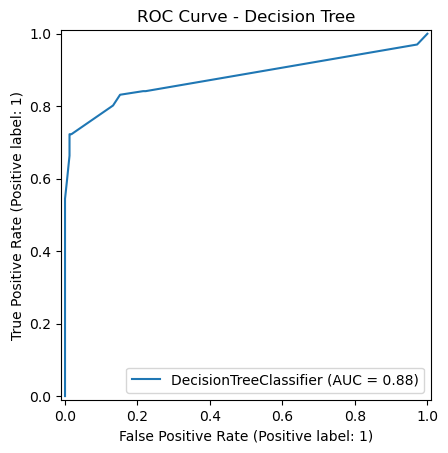

In [19]:
# Initialize the model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Decision Tree Classifier Report:\n")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dt))

# ROC Curve
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("ROC Curve - Decision Tree")
plt.show()
 


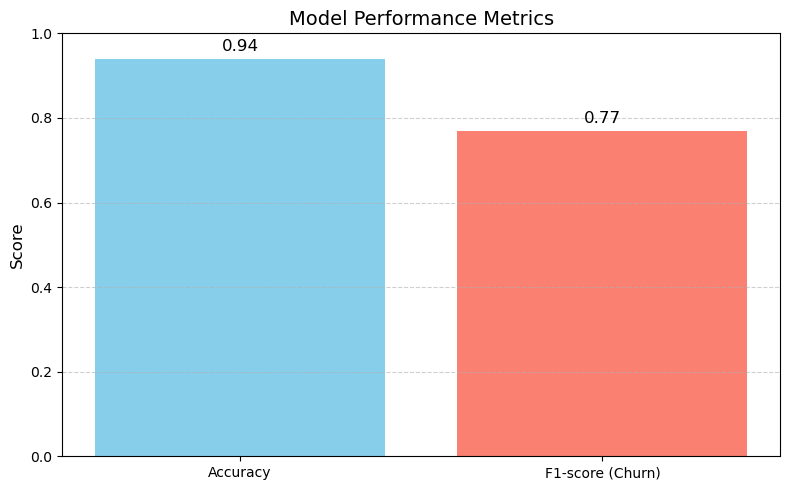

In [20]:
import matplotlib.pyplot as plt

# Performance scores
accuracy = 0.94
f1_score = 0.77

# Labels and values
metrics = ['Accuracy', 'F1-score (Churn)']
scores = [accuracy, f1_score]
colors = ['skyblue', 'salmon']

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=colors)

# Add value labels on bars
for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Plot details
plt.ylim(0, 1)
plt.title('Model Performance Metrics', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


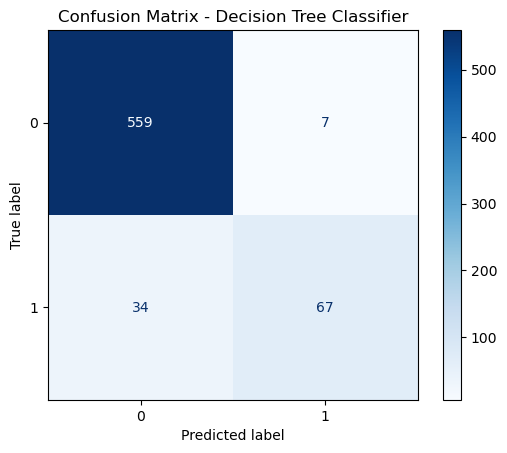

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()


* The decision tree model provides decent classification of churners, with interpretable rules and a reasonable ROC AUC score, making it useful for identifying at-risk customers

Feature Importance

C:\Users\PC\AppData\Local\Temp\ipykernel_17216\651168449.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:10], y=importances.index[:10], palette='viridis')


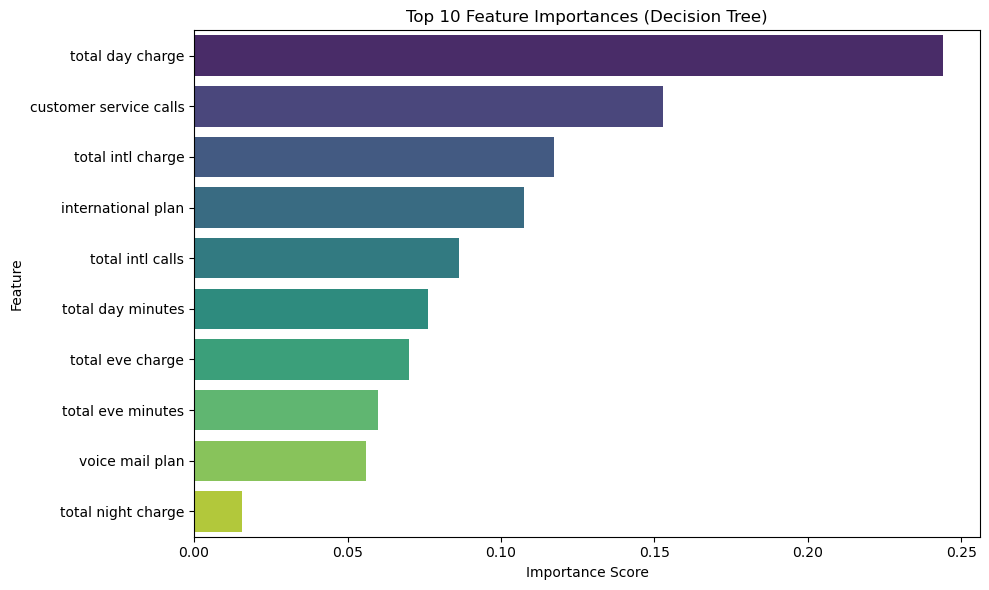

In [22]:
# Plot feature importances from the decision tree
importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10], palette='viridis')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


* The model highlights that customer behavior and billing features, especially service interactions and daytime usage, are key churn indicators. Prioritize these for intervention strategies

2. Logistic Regression

Logistic Regression Report:

[[551  15]
 [ 80  21]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667

ROC AUC Score: 0.8165692894377776


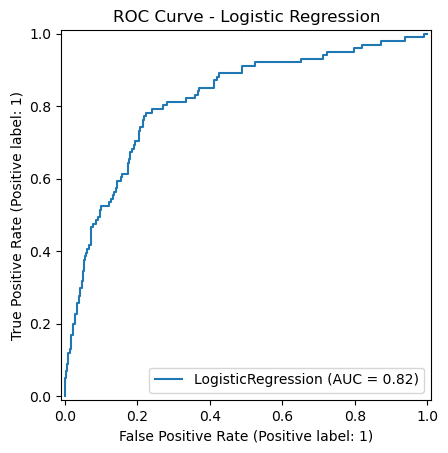

In [23]:
# Initialize and fit
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Logistic Regression Report:\n")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lr))

# ROC Curve
RocCurveDisplay.from_estimator(lr_model, X_test_scaled, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()


* The model highlights that customer behavior and billing features, especially service interactions and daytime usage, are key churn indicators. Prioritize these for intervention strategies

KMeans Clustering

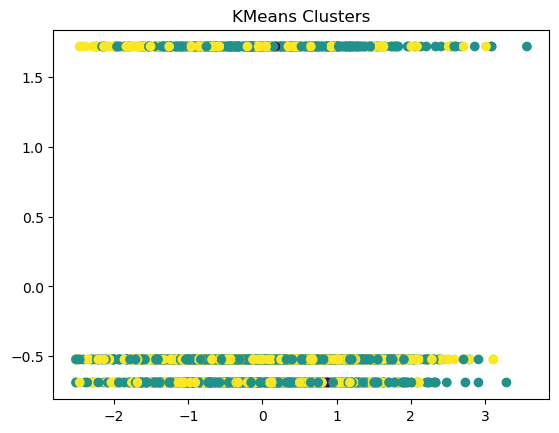

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters 

# Plotting the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title("KMeans Clusters")
plt.show()
 


* The clustering helps segment customers into behavior-based groups, which can be useful for targeted marketing, personalized offers, or churn risk profiling.

Ridge & Lasso Regression

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)


Lasso(alpha=0.01)

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

 Polynomial Regression

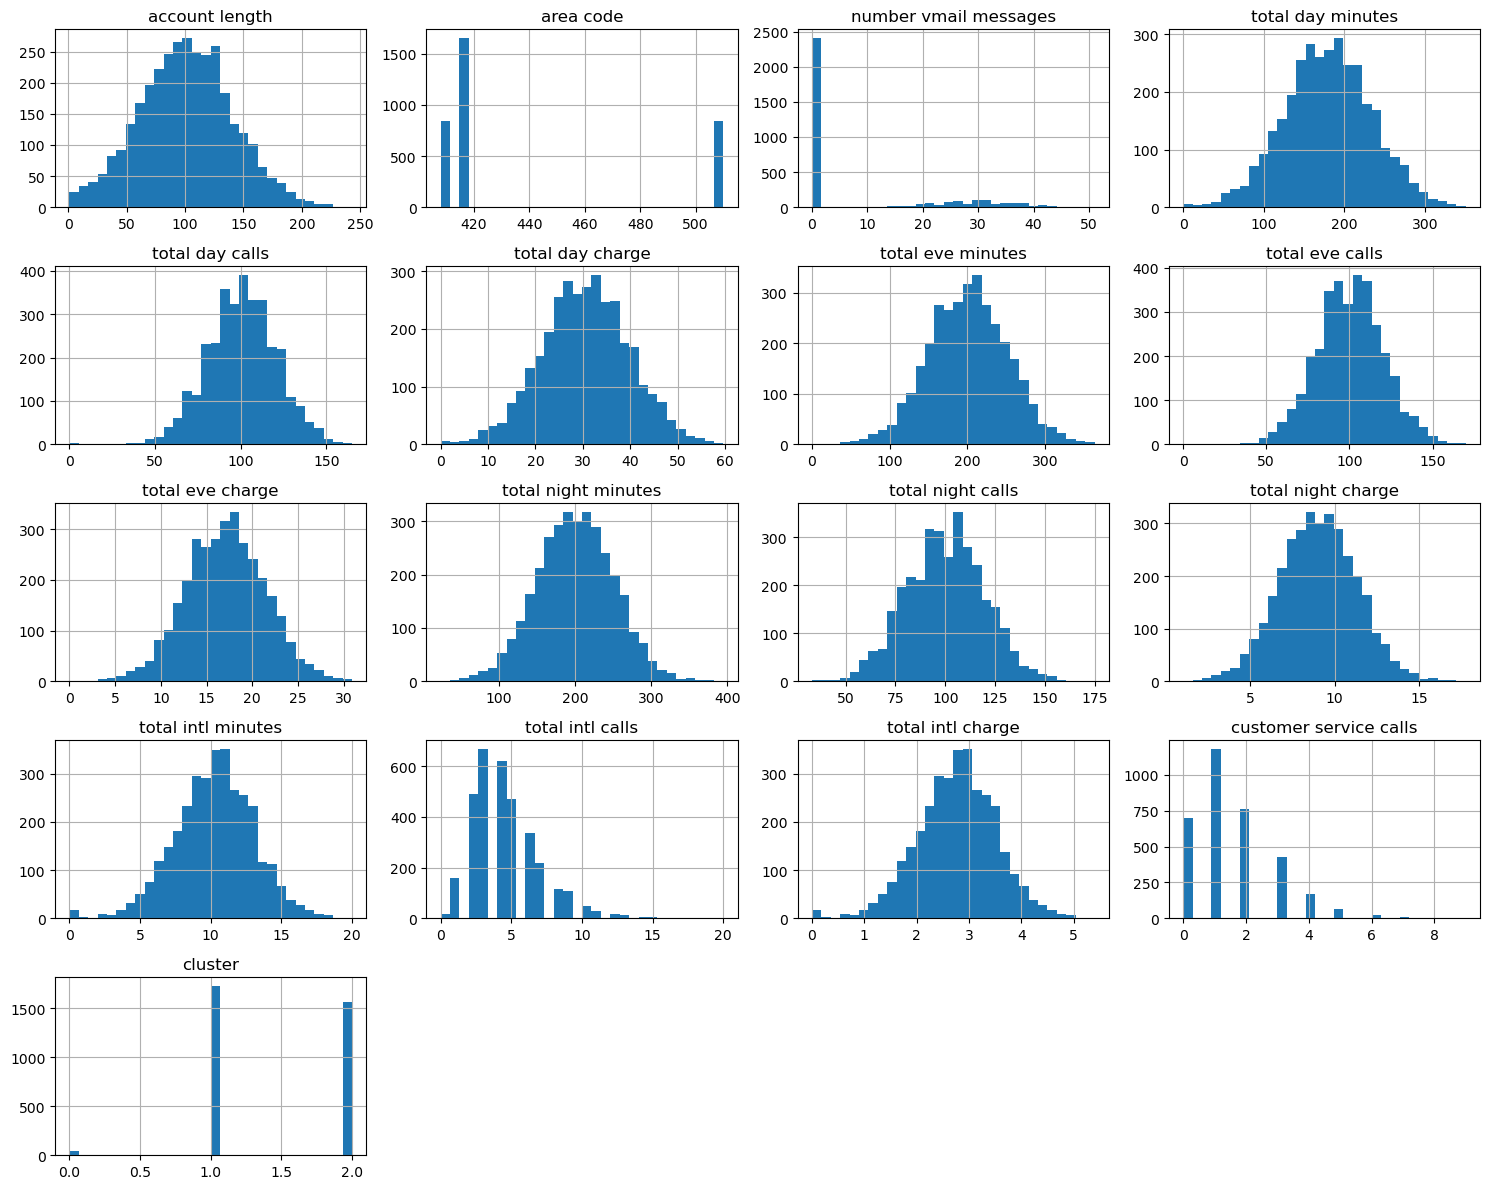

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred = poly_model.predict(X_test)

num_cols = df.select_dtypes(include='number').columns

df[num_cols].hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

* Polynomial regression enhances model flexibility. Visualizing feature distributions helps understand data skewness, detect outliers, and guide feature engineering or scaling decisions.


## Business Insights & Recommendations
Top Insights:

* International Plan Customers Are at High Risk
Customers subscribed to an international plan have higher churn rates. This could signal dissatisfaction with international rates or call quality.

* Frequent Customer Service Callers Churn More
Customers who make more than 3 service calls are significantly more likely to churn. This suggests customer support issues or unresolved complaints.

* High Usage May Not Equal Loyalty
High total day minutes can be associated with churn, indicating that even active users might leave—possibly for cost-related reasons.